In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from federated_inference.common.utils import set_seed
from federated_inference.configs.data_config import DataConfiguration
from federated_inference.configs.transform_config import DataTransformConfiguration
from federated_inference.simulations.oncloud.simulation import OnCloudVerticalSimulation

In [ ]:
from federated_inference.simulations.oncloud.models.model import OnCloudMNISTModel
DATASET = 'CIFAR10'
VERSION = "v1"
for seed in [4]:
    data_config = DataConfiguration(DATASET)
    transform_config = DataTransformConfiguration()
    simulation = OnCloudVerticalSimulation(seed, VERSION, data_config, transform_config, OnCloudMNISTModel, exist=False)
    simulation.train()



KeyboardInterrupt



In [34]:
from federated_inference.simulations.oncloud.models.model import OnCloudCIFAR10Model
DATASET = 'CIFAR10'
VERSION = "v1"
seed = 4
data_config = DataConfiguration(DATASET)
transform_config = DataTransformConfiguration()
simulation = OnCloudVerticalSimulation(seed, VERSION, data_config, transform_config, OnCloudCIFAR10Model, exist=False)

CIFAR10 training data loaded.
CIFAR10 test data loaded.


In [35]:
simulation.train()

shuffle training_data

Test set: Average loss per sample: 0.0362, Accuracy: 989/10000 (10%)

Train Epoch: 1 [0/40000 (0%)]	Loss: 2.565559
Train Epoch: 1 [6400/40000 (16%)]	Loss: 1.536190
Train Epoch: 1 [12800/40000 (32%)]	Loss: 1.205293
Train Epoch: 1 [19200/40000 (48%)]	Loss: 1.299086
Train Epoch: 1 [25600/40000 (64%)]	Loss: 1.331453
Train Epoch: 1 [32000/40000 (80%)]	Loss: 1.278024
Train Epoch: 1 [38400/40000 (96%)]	Loss: 1.143758
Validation loss improved. Saving model...

Test set: Average loss per sample: 0.0173, Accuracy: 6103/10000 (61%)

Train Epoch: 2 [0/40000 (0%)]	Loss: 1.045830
Train Epoch: 2 [6400/40000 (16%)]	Loss: 1.222050
Train Epoch: 2 [12800/40000 (32%)]	Loss: 1.212833
Train Epoch: 2 [19200/40000 (48%)]	Loss: 1.056063
Train Epoch: 2 [25600/40000 (64%)]	Loss: 1.177644
Train Epoch: 2 [32000/40000 (80%)]	Loss: 0.922543
Train Epoch: 2 [38400/40000 (96%)]	Loss: 1.146433
Validation loss improved. Saving model...

Test set: Average loss per sample: 0.0149, Accuracy: 6701/1000

In [29]:
import torch

print("CUDA available:", torch.cuda.is_available())

CUDA available: True


In [26]:
simulation.client_datasets[0].train_dataset.dataset[0][0][0].evidence.size()

torch.Size([3, 14, 14])

In [4]:
from federated_inference.configs.data_config import DataConfiguration
from federated_inference.configs.transform_config import DataTransformConfiguration
from federated_inference.simulations.ondevice.simulation import OnDeviceVerticalSimulation
from federated_inference.simulations.ondevice.models import OnDeviceCIFAR10Model

DATASET = 'CIFAR10'
VERSION = "v1"
seed = 4
data_config = DataConfiguration(DATASET)
transform_config = DataTransformConfiguration()
simulation = OnDeviceVerticalSimulation(seed, VERSION, data_config, transform_config, OnDeviceCIFAR10Model, exist=False)
simulation.train()


CIFAR10 training data loaded.
CIFAR10 test data loaded.

Test set: Average loss per sample: 0.0363, Accuracy: 994/10000 (10%)

Train Epoch: 1 [0/40000 (0%)]	Loss: 2.413661
Train Epoch: 1 [6400/40000 (16%)]	Loss: 2.303449
Train Epoch: 1 [12800/40000 (32%)]	Loss: 2.311724
Train Epoch: 1 [19200/40000 (48%)]	Loss: 2.306999
Train Epoch: 1 [25600/40000 (64%)]	Loss: 2.301485
Train Epoch: 1 [32000/40000 (80%)]	Loss: 2.299083
Train Epoch: 1 [38400/40000 (96%)]	Loss: 2.286831
Validation loss improved. Saving model...

Test set: Average loss per sample: 0.0353, Accuracy: 1291/10000 (13%)

Train Epoch: 2 [0/40000 (0%)]	Loss: 2.231309
Train Epoch: 2 [6400/40000 (16%)]	Loss: 2.233622
Train Epoch: 2 [12800/40000 (32%)]	Loss: 2.275775
Train Epoch: 2 [19200/40000 (48%)]	Loss: 2.239760
Train Epoch: 2 [25600/40000 (64%)]	Loss: 2.203533
Train Epoch: 2 [32000/40000 (80%)]	Loss: 2.271763
Train Epoch: 2 [38400/40000 (96%)]	Loss: 2.220092
Validation loss improved. Saving model...

Test set: Average loss per s

# Visualization

2025-10-19 11:01:38,932 - WARNING - Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.79607844].


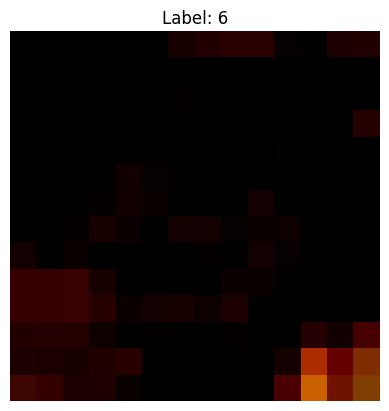

In [ ]:
import matplotlib.pyplot as plt

# Assuming you're using PyTorch and simulation is already defined
image, label = simulation.dataset.train_dataset[0]
image = simulation.client_datasets[0].train_dataset.dataset[0][0][0].evidence

# If the image is a tensor, convert it to numpy
if hasattr(image, 'numpy'):
    image = image.numpy()

# If the image has shape [C, H, W], convert it to [H, W, C]
if image.ndim == 3 and image.shape[0] in [1, 3]:
    image = image.transpose(1, 2, 0)

# Plot the image
plt.imshow(image, cmap='gray' if image.ndim == 2 or image.shape[2] == 1 else None)
plt.title(f'Label: {label}')
plt.axis('off')
plt.show()